In [2]:
!pip install git+https://github.com/huggingface/diffusers
!pip install transformers accelerate safetensors

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-xizczv7l
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-xizczv7l
  Resolved https://github.com/huggingface/diffusers to commit f912f39b50f87e50a9d99346f5c1b6e644653262
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.1 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.22.0.dev0-py3-none-any.whl size=1602258 sha256=620331c1098944c87ff6f3ae1db00245f88995be5e5ab3a373bc5ad0aa4e1cf2
  Stored in directory: /tmp/pip-ephem-wheel-cache-30jq8g1q/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 53.9 MB/s eta 0:00:

In [3]:
from diffusers import StableDiffusionXLPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:

pipe = StableDiffusionXLPipeline.from_pretrained(
    "segmind/SSD-1B",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
pipe.to("cuda")

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.22.0.dev0",
  "_name_or_path": "segmind/SSD-1B",
  "force_zeros_for_empty_prompt": true,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [5]:

%time
from transformers.pipelines.image_to_text import Image
from IPython.display import display

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.15 µs


  0%|          | 0/50 [00:00<?, ?it/s]

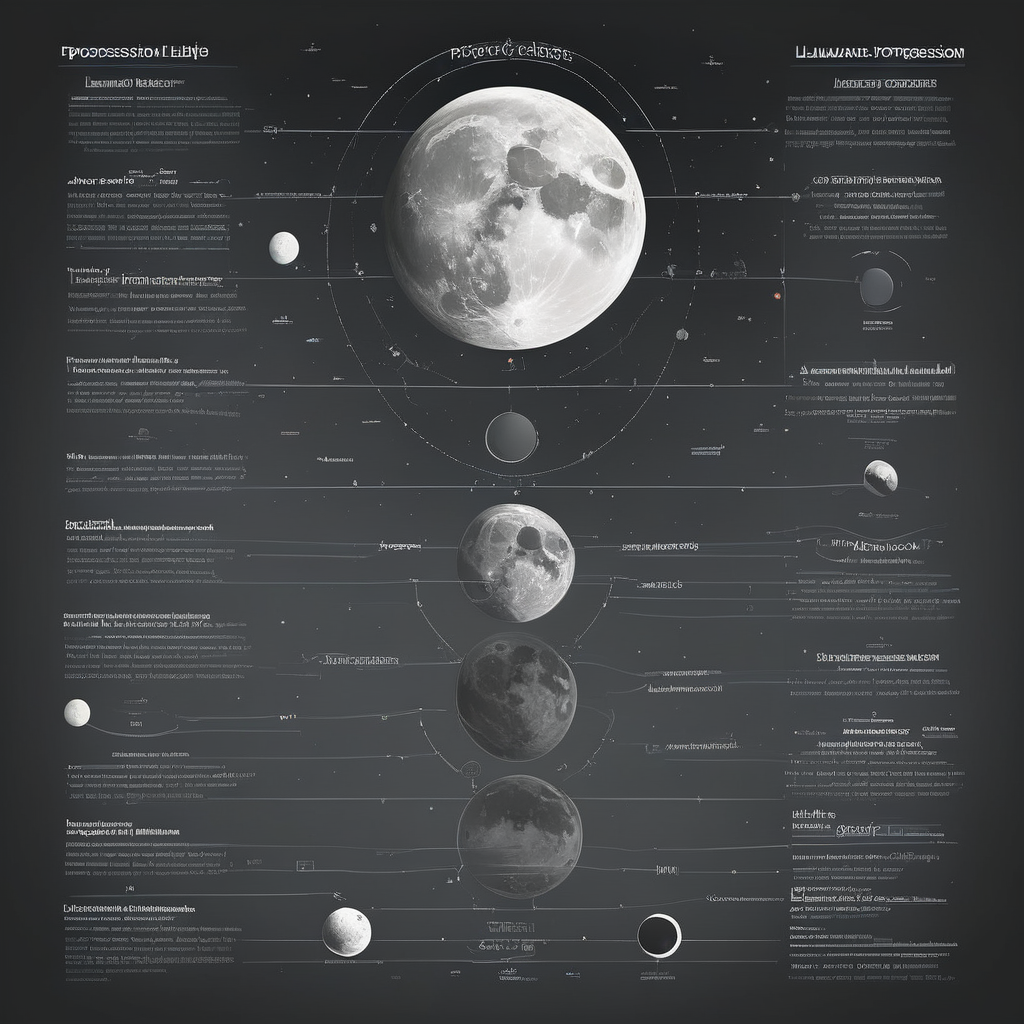

In [17]:

prompt = "Vector design of a lunar eclipse progression chart. Starting with the full moon on the left, it transitions through the penumbral, partial, and total phases, ending with the moon fully enveloped in Earth's shadow on the right. Each phase is labeled and accompanied by brief annotations explaining the phenomenon."
neg_prompt = "ugly, blurry, poor quality"

image = pipe(prompt=prompt, negative_prompt=neg_prompt).images[0]

display(image)

In [15]:
image.save('result1.png')
